<a href="https://colab.research.google.com/github/abdelrahmankhaled2001/NLP-Project/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Question Answering System for Laptop Accessories


## Introduction

Welcome to our project focused on building a Question Answering System to assist users in making informed purchasing decisions for laptop accessories. The project centers around analyzing Amazon's 500 Bestsellers in Laptop Gear 2024 dataset, which provides insights into the current laptop accessory market on Amazon.

The primary objective of this project is to develop a robust Question Answering System that can provide users with relevant information and recommendations based on their queries. To achieve this goal, we will employ a combination of data analysis, machine learning, and natural language processing techniques.

Throughout the project, we aim to achieve the following objectives:

1. Conduct thorough data analysis to understand the characteristics and trends present within the dataset.
2. Build and train neural network models to accurately answer user queries about laptop accessories.
3. Evaluate the performance of the models and refine them using advanced techniques such as fine-tuning with pre-trained models.

By the end of this project, we aspire to deliver a practical and effective Question Answering System that can enhance the shopping experience for users seeking to purchase laptop accessories.

Let's embark on this journey by exploring the dataset and conducting initial data analysis.


### Section 1: Data Exploration and Setup

In this section, we'll explore the dataset to understand its structure and contents. We'll also set up the notebook by importing necessary libraries and loading the dataset.


To begin, we'll import the required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter

Loading the dataset into a pandas DataFrame and display the first few rows to understand its structure.

In [2]:
dataset_url = "https://drive.google.com/uc?id=1Kn2Sy0gbd_y9TvbwgSVTi1thDVX-MrX2"
df = pd.read_csv(dataset_url)
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           500 non-null    object 
 1   brand           500 non-null    object 
 2   description     255 non-null    object 
 3   price/currency  470 non-null    object 
 4   price/value     470 non-null    float64
 5   stars           259 non-null    float64
 6   reviewsCount    259 non-null    float64
dtypes: float64(3), object(4)
memory usage: 27.5+ KB


In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Missing Values:
title               0
brand               0
description       245
price/currency     30
price/value        30
stars             241
reviewsCount      241
dtype: int64

Number of Duplicate Rows: 0


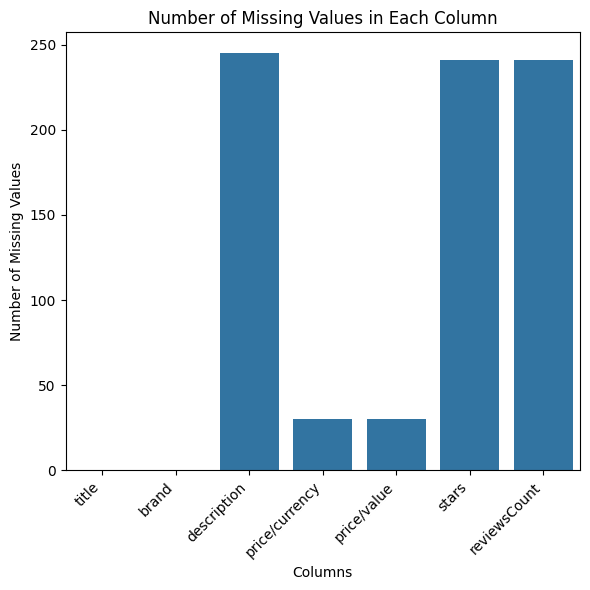

In [39]:
plt.figure(figsize=(6, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [3]:
df['description'].fillna("No Description Available", inplace=True)
numerical_features = ['stars', 'reviewsCount']
df[numerical_features] = df[numerical_features].fillna(0)
df.dropna(subset=['price/value'], inplace=True)

Compute summary statistics for numerical variables (price_value, stars, reviews). This includes measures such as mean, median, standard deviation, minimum, and maximum values.

In [41]:
descriptive_stats = df[['price/value', 'stars', 'reviewsCount']].describe()
print(descriptive_stats)

       price/value       stars  reviewsCount
count   470.000000  470.000000    470.000000
mean     38.341702    2.378723    500.453191
std      50.885042    2.292375   2670.956700
min       2.990000    0.000000      0.000000
25%       9.990000    0.000000      0.000000
50%      24.990000    3.950000      1.000000
75%      44.052500    4.600000     43.500000
max     575.000000    5.000000  42821.000000


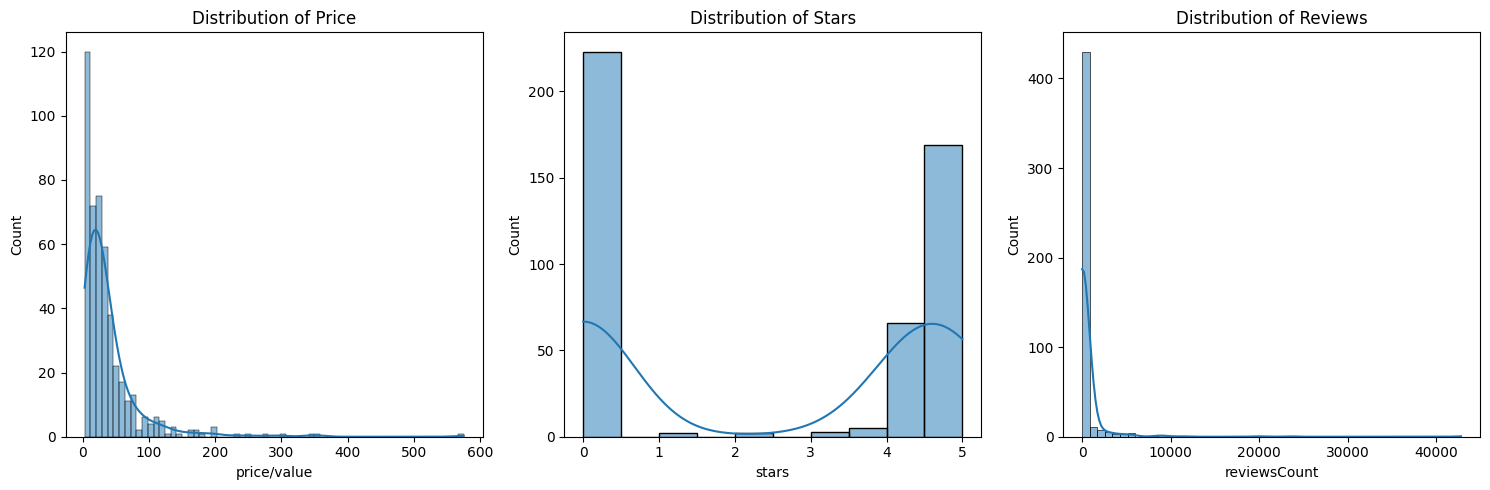

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['price/value'], kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 3, 2)
sns.histplot(df['stars'], kde=True)
plt.title('Distribution of Stars')

plt.subplot(1, 3, 3)
sns.histplot(df['reviewsCount'],bins= 50 ,kde=True)
plt.title('Distribution of Reviews')

plt.tight_layout()
plt.show()

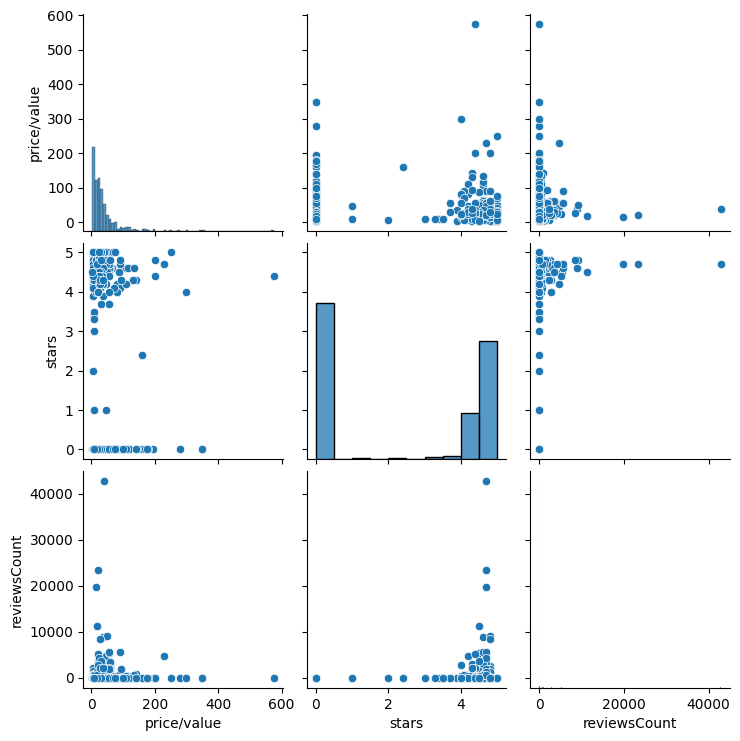

In [43]:
numeric_columns=df[['price/value', 'stars', 'reviewsCount']]
sns.pairplot(numeric_columns)
plt.show()

              price/value     stars  reviewsCount
price/value      1.000000 -0.061487      0.002562
stars           -0.061487  1.000000      0.182873
reviewsCount     0.002562  0.182873      1.000000


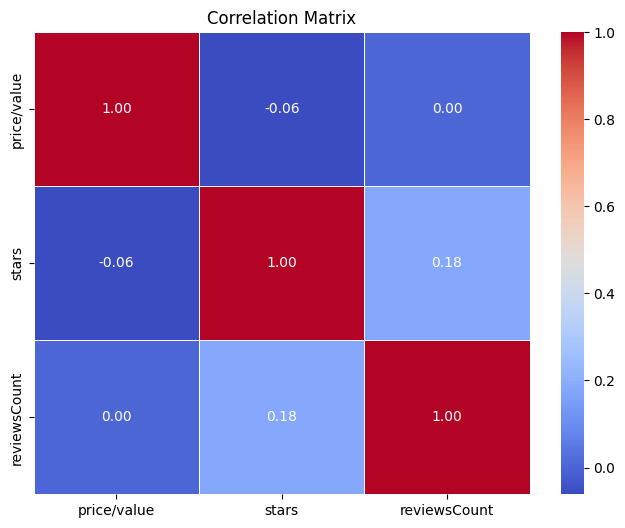

In [44]:
correlation_matrix = df[['price/value', 'stars', 'reviewsCount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [49]:
print("\nUnique values for the 'Brand' column:")
print(df['brand'].unique())
print("\n Number of unique brands ",len(df['brand'].unique()))
print("\nValue counts for the 'Brand' column:")
print(df['brand'].value_counts())


Unique values for the 'Brand' column:
['NELEBUTO' 'EMPSIGN' 'MOQIAN' 'JESWO' 'ANCBD' 'QEYNIU' 'Litwaro' 'JSYAVG'
 'ROTY' 'Lonisiv' 'Diuyose' 'Gogoonike' 'Aigemumy' 'Shaari' 'Miwasion'
 'YANENAN' 'LINKEET' 'TOBENONE' 'ARZOPA' 'Lacdo' 'Pterosauria' 'LUXJA'
 'Thibault' 'VVB' 'Seorsok' 'CALCINI' 'Imarisha' 'COOLCOOLDE' 'Bonitzdm'
 'OWTEMLKE' 'LOVEVOOK' 'BAGSMART' 'NEWHEY' 'YOULEY' 'DWQOO' 'Dell' 'STOON'
 'FISYOD' 'Baseus' 'SINKWER' 'Generic' 'BTOOP' 'LHST' 'Capolo' 'dokikalos'
 'KELOOF' 'UNGNU' 'TOOREEY' 'EAVIN GARY' 'MOSISO' 'TigerDad' 'FIXITOK'
 'WONHOX' 'YOYEE' 'soonjet' 'PYS' 'BJSK' 'RACAHOO' 'EooCoo' 'LUKCOZMO'
 'ELECBRAiN' 'GELINTO' 'wonfurd' 'Lemorele' 'BE•SELL' 'coowoz' 'SDYSM'
 'HHamoyzs' 'Kensington' 'Sinaliy' 'Twelve South' 'SwissGear'
 'Amazon Basics' 'Pyle' 'Lowepro' 'JanSport' 'Victoriatourist' 'RAINSMORE'
 'MOKiN' 'Focdod' 'Beraliy' 'Dwavele' 'VANKEAN' 'Sonix' 'MeityPinkty'
 'UOROLBMY' 'Ajiga' 'FALANKO' 'Jzbulo' 'CZSWMD' 'SANYOM' 'Batianda'
 'StarTech.com' 'Lenovo' 'Plugabl

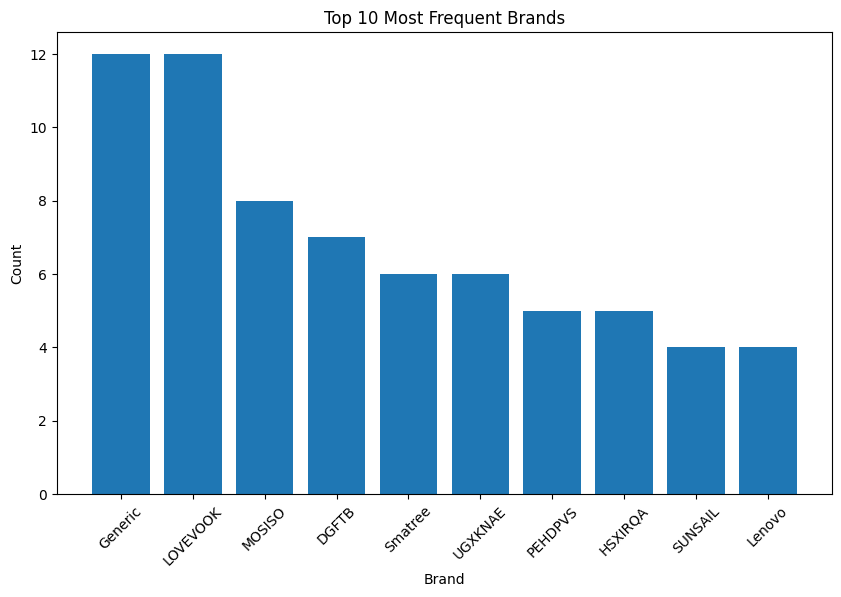

In [7]:
top_10_brands = df['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_brands.index, top_10_brands.values)
plt.title("Top 10 Most Frequent Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [74]:
print("\nUnique values for the 'price/currency' column:")
print(df['price/currency'].unique())
print("\nValue counts for the 'price/currency' column:")
print(df['price/currency'].value_counts())


Unique values for the 'price/currency' column:
['$' nan]

Value counts for the 'price/currency' column:
$    470
Name: price/currency, dtype: int64


In [4]:
df = df.drop(columns=['price/currency'])

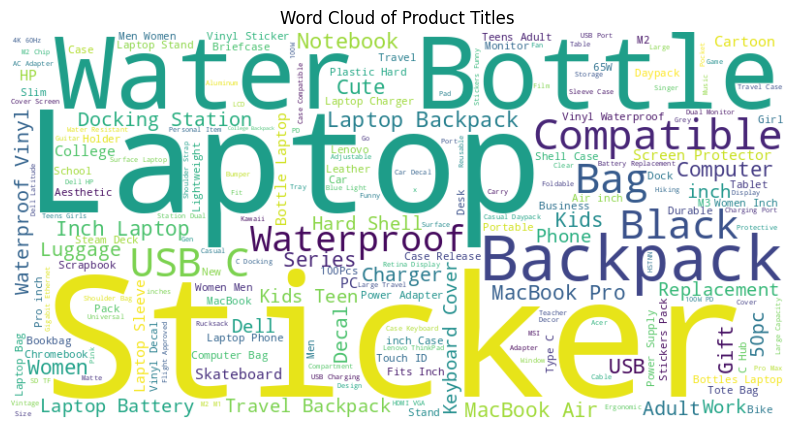

In [11]:
all_titles = ' '.join(df['title'])
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Titles')
plt.axis('off')
plt.show()

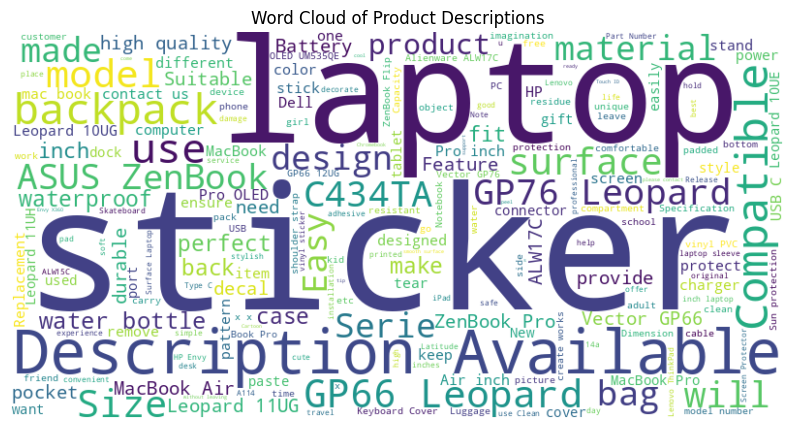

In [12]:
all_descriptions = ' '.join(df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Descriptions')
plt.axis('off')
plt.show()

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

In [7]:
def compute_basic_text_statistics(text_list):
    combined_text = ' '.join(text_list)
    tokens=word_tokenize(combined_text)
    word_count = len(tokens)
    character_count = len(combined_text)
    sentence_count = len(sent_tokenize(combined_text))
    avg_word_length = np.mean([len(token) for token in tokens])

    return word_count, character_count, sentence_count, avg_word_length


In [8]:
title_stats = compute_basic_text_statistics(df['title'].tolist())

print("\nTitle Statistics:")
print("Word Count:", title_stats[0])
print("Character Count:", title_stats[1])
print("Sentence Count:", title_stats[2])
print("Average Word Length:", title_stats[3])


description_stats = compute_basic_text_statistics(df['description'].tolist())

print("Description Statistics:")
print("Word Count:", description_stats[0])
print("Character Count:", description_stats[1])
print("Sentence Count:", description_stats[2])
print("Average Word Length:", description_stats[3])


Title Statistics:
Word Count: 13107
Character Count: 77731
Sentence Count: 15
Average Word Length: 5.055695429922942
Description Statistics:
Word Count: 33050
Character Count: 186068
Sentence Count: 992
Average Word Length: 4.783842662632376


In [9]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

In [10]:
df['cleaned_title'] = df['title'].apply(clean_text)
df['tokenized_title'] = df['cleaned_title'].apply(tokenize_text)

df['cleaned_description'] = df['description'].apply(clean_text)
df['tokenized_description'] = df['cleaned_description'].apply(tokenize_text)

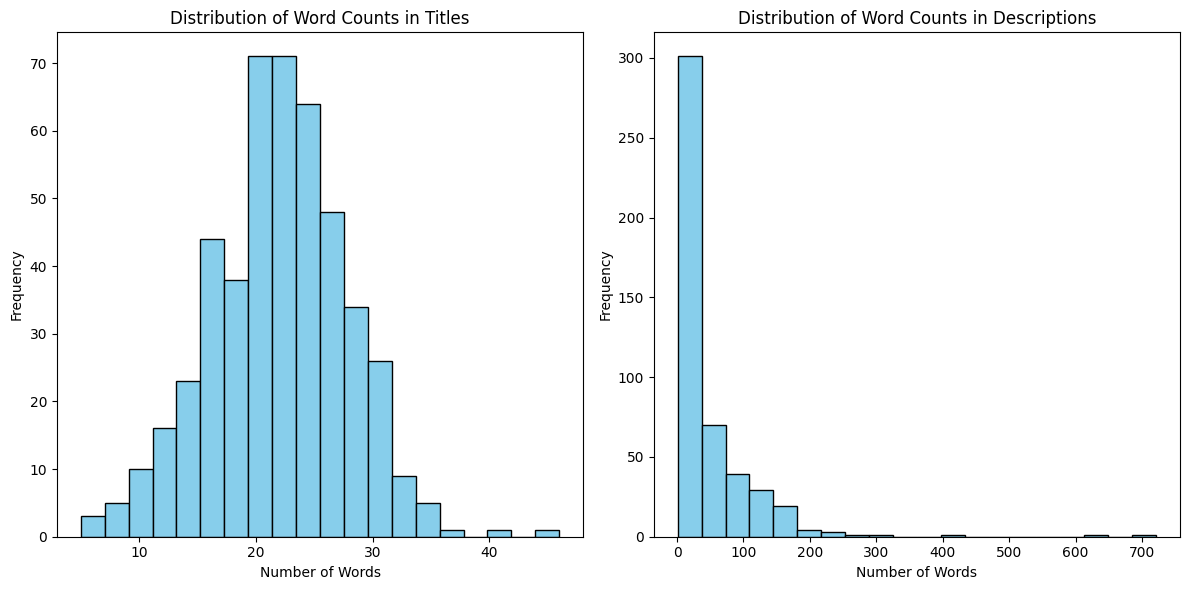

In [11]:
df['title_word_count'] = df['tokenized_title'].apply(len)
df['description_word_count'] = df['tokenized_description'].apply(len)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['title_word_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Titles')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['description_word_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Descriptions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
def analyze_tokens(tokens):
    vocab_size = len(set(tokens))
    word_freq = Counter(tokens)
    return vocab_size, word_freq

In [13]:
def plot_word_frequency(word_freq, title):
    top_words = [word[0] for word in word_freq.most_common(10)]
    top_freqs = [word[1] for word in word_freq.most_common(10)]
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_freqs, color='skyblue')
    plt.ylabel('Frequency')
    plt.xlabel('Word')
    plt.title('Top 10 Most Common Words in {}'.format(title))
    plt.show()

Title Vocabulary Size: 2837

Description Vocabulary Size: 5540


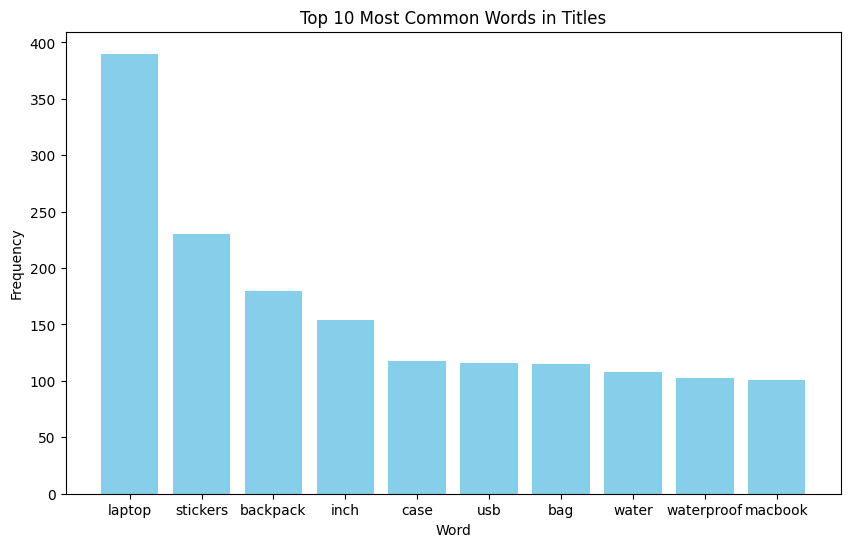

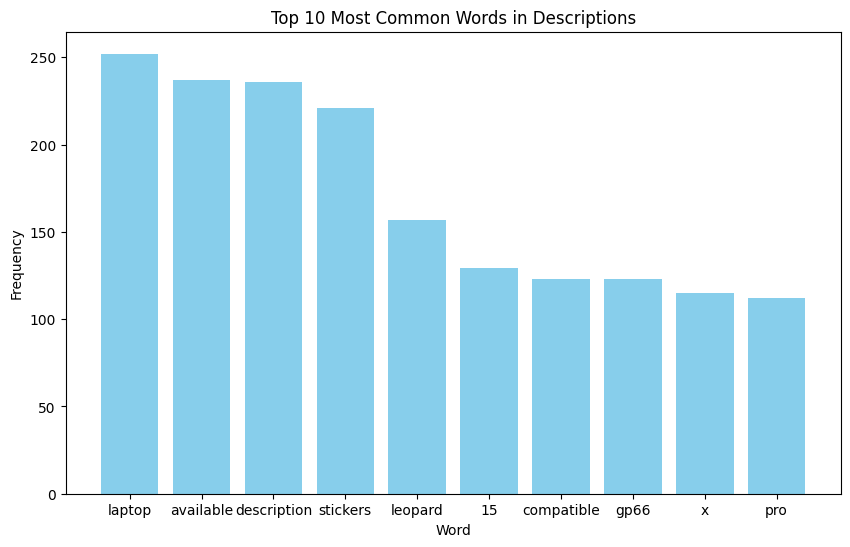

In [14]:
title_vocab_size, title_word_freq = analyze_tokens(df['tokenized_title'].sum())
description_vocab_size, description_word_freq = analyze_tokens(df['tokenized_description'].sum())
print("Title Vocabulary Size:", title_vocab_size)
print("\nDescription Vocabulary Size:", description_vocab_size)
plot_word_frequency(title_word_freq, 'Titles')
plot_word_frequency(description_word_freq, 'Descriptions')

In [10]:
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens




In [11]:
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens ]
    return lemmatized_tokens

In [50]:
df['stemmed_title'] = df['tokenized_title'].apply(stem_tokens)
df['lemmatized_title'] = df['tokenized_title'].apply(lemmatize_tokens)


df['stemmed_description'] = df['tokenized_description'].apply(stem_tokens)
df['lemmatized_description'] = df['tokenized_description'].apply(lemmatize_tokens)


print(df[['title', 'tokenized_title', 'stemmed_title', 'lemmatized_title',
          'description', 'tokenized_description', 'stemmed_description', 'lemmatized_description']].head())

                                               title  \
0  65W Universal USB C Chromebook Charger,Replace...   
1  EMPSIGN Laptop Tote bag for women 16 Inch, Sty...   
2  100Pcs Mario Stickers, Cartoon Game Mario Stic...   
3  USB Docking Station, JESWO USB 3.0 Laptop Dock...   
4  ANCBD C31N1824 Battery for Asus Chromebook Fli...   

                                     tokenized_title  \
0  [65w, universal, usb, c, chromebook, chargerre...   
1  [empsign, laptop, tote, bag, women, 16, inch, ...   
2  [100pcs, mario, stickers, cartoon, game, mario...   
3  [usb, docking, station, jeswo, usb, 30, laptop...   
4  [ancbd, c31n1824, battery, asus, chromebook, f...   

                                       stemmed_title  \
0  [65w, univers, usb, c, chromebook, chargerrepl...   
1  [empsign, laptop, tote, bag, women, 16, inch, ...   
2  [100pc, mario, sticker, cartoon, game, mario, ...   
3  [usb, dock, station, jeswo, usb, 30, laptop, d...   
4  [ancbd, c31n1824, batteri, asu, chromebook,